Upload file for 'noisy_image':


Saving IMG_20210911_084234.jpg to IMG_20210911_084234.jpg
'noisy_image' loaded successfully, shape: (3000, 4000)
Upload file for 'uneven_lighting':


Saving IMG_20210911_084234.jpg to IMG_20210911_084234 (1).jpg
'uneven_lighting' loaded successfully, shape: (3000, 4000)
Upload file for 'edges':


Saving IMG_20210911_084234.jpg to IMG_20210911_084234 (2).jpg
'edges' loaded successfully, shape: (3000, 4000)
Upload file for 'corner_sample':


Saving IMG_20210911_084234.jpg to IMG_20210911_084234 (3).jpg
'corner_sample' loaded successfully, shape: (3000, 4000)
Upload file for 'match1':


Saving IMG_20210911_084234.jpg to IMG_20210911_084234 (4).jpg
'match1' loaded successfully, shape: (3000, 4000)
Upload file for 'match2':


Saving IMG_20210911_084234.jpg to IMG_20210911_084234 (5).jpg
'match2' loaded successfully, shape: (3000, 4000)


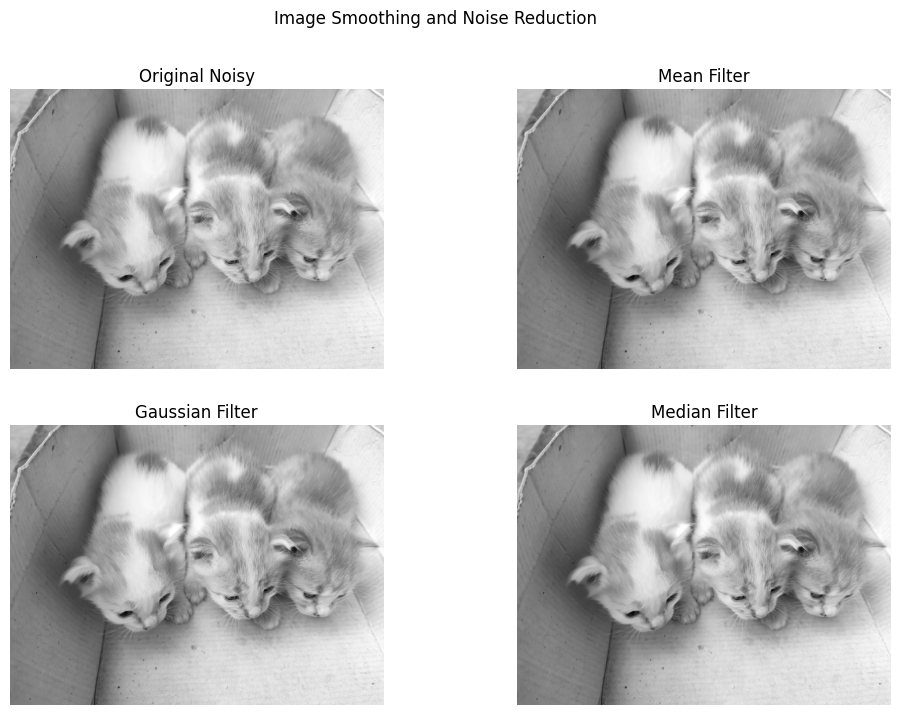

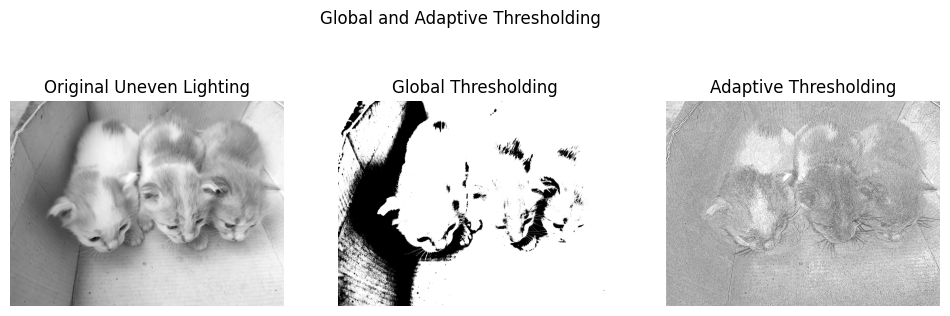

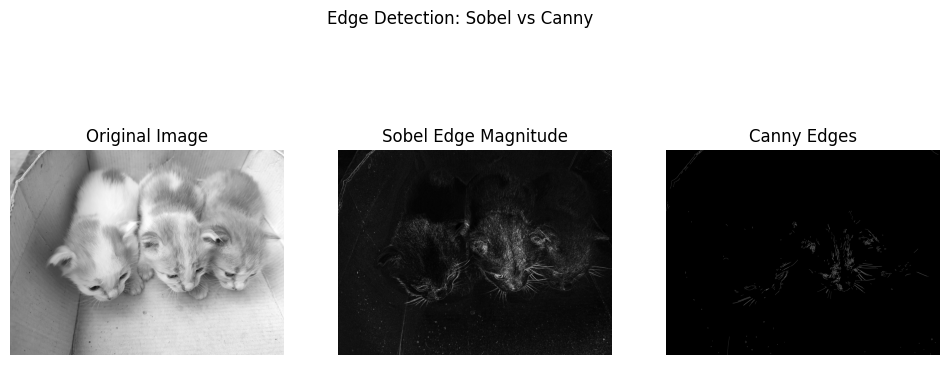

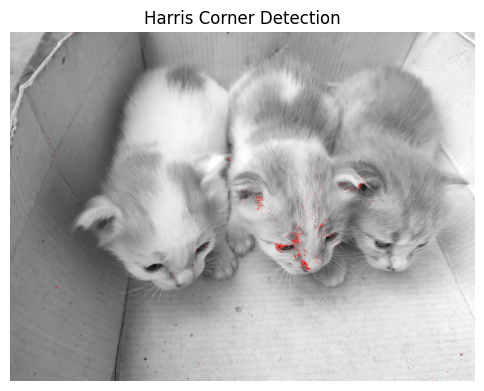

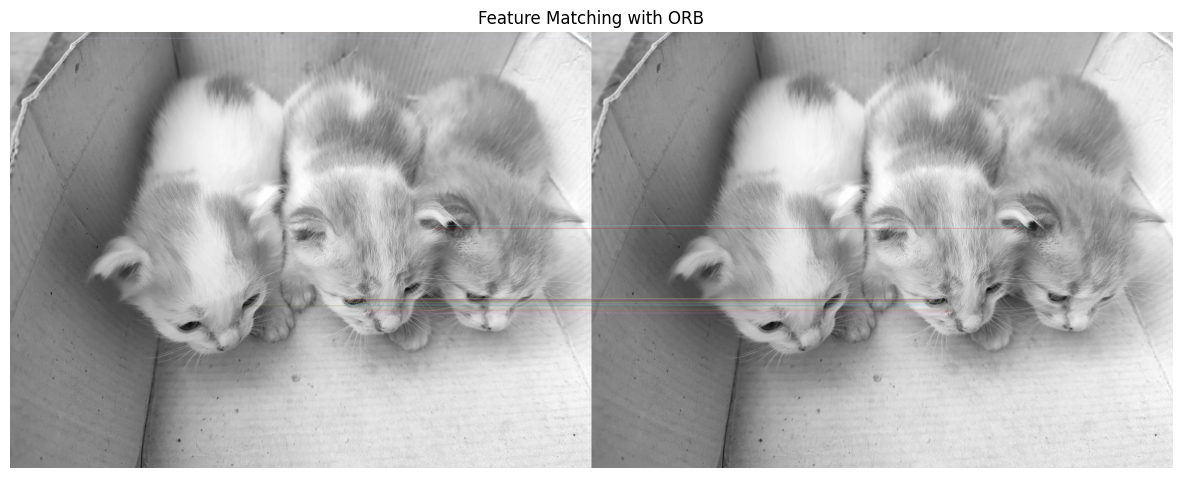

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#Upload Multiple Images
def upload_images(names):
    images = {}
    for name in names:
        print(f"Upload file for '{name}':")
        uploaded = files.upload()
        for filename in uploaded.keys():
            img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images[name] = img
                print(f"'{name}' loaded successfully, shape: {img.shape}")
            else:
                print(f"Failed to load '{name}'")
    return images

# Expected images for tasks
expected_images = [
    'noisy_image',
    'uneven_lighting',
    'edges',
    'corner_sample',
    'match1',
    'match2'
]

# Upload images
uploaded_images = upload_images(expected_images)

# Image Smoothing and Noise Reduction
def image_smoothing_filters(image):
    mean_filtered = cv2.blur(image, (5, 5))
    gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)
    median_filtered = cv2.medianBlur(image, 5)
    return mean_filtered, gaussian_filtered, median_filtered

# Global and Adaptive Thresholding
def thresholding_methods(image, global_thresh=128):
    _, global_thresh_img = cv2.threshold(image, global_thresh, 255, cv2.THRESH_BINARY)
    adaptive_thresh_img = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2)
    return global_thresh_img, adaptive_thresh_img

# Edge Detection Using Sobel and Canny
def sobel_edge_detection(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = cv2.magnitude(grad_x, grad_y)
    mag_display = cv2.convertScaleAbs(magnitude)
    return mag_display

def canny_edge_detection(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

# Harris Corner Detection
def harris_corner_detection(image):
    image_float = np.float32(image)
    dst = cv2.cornerHarris(image_float, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    corner_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    corner_img[dst > 0.01 * dst.max()] = [0, 0, 255]
    return corner_img

# Feature Matching using ORB
def feature_matching(img1, img2):
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)
    return matched_img

# Visualization and execution
def main(images):
    # Image Smoothing
    noisy = images['noisy_image']
    mean_f, gauss_f, median_f = image_smoothing_filters(noisy)
    plt.figure(figsize=(12, 8))
    for i, img in enumerate([noisy, mean_f, gauss_f, median_f]):
        plt.subplot(2, 2, i+1)
        plt.imshow(img, cmap='gray')
        titles = ['Original Noisy', 'Mean Filter', 'Gaussian Filter', 'Median Filter']
        plt.title(titles[i])
        plt.axis('off')
    plt.suptitle('Image Smoothing and Noise Reduction')
    plt.show()

    # Thresholding
    uneven = images['uneven_lighting']
    global_t, adaptive_t = thresholding_methods(uneven)
    plt.figure(figsize=(12, 4))
    for i, img in enumerate([uneven, global_t, adaptive_t]):
        plt.subplot(1, 3, i+1)
        plt.imshow(img, cmap='gray')
        titles = ['Original Uneven Lighting', 'Global Thresholding', 'Adaptive Thresholding']
        plt.title(titles[i])
        plt.axis('off')
    plt.suptitle('Global and Adaptive Thresholding')
    plt.show()

    # Edge Detection
    edge_img = images['edges']
    sobel_mag = sobel_edge_detection(edge_img)
    canny_edges = canny_edge_detection(edge_img)
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    plt.imshow(edge_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(sobel_mag, cmap='gray')
    plt.title('Sobel Edge Magnitude')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')
    plt.suptitle('Edge Detection: Sobel vs Canny')
    plt.show()

    # Harris Corners
    corner_img = images['corner_sample']
    harris_corners = harris_corner_detection(corner_img)
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(harris_corners, cv2.COLOR_BGR2RGB))
    plt.title('Harris Corner Detection')
    plt.axis('off')
    plt.show()

    # Feature Matching
    match1 = images['match1']
    match2 = images['match2']
    matched_img = feature_matching(match1, match2)
    plt.figure(figsize=(15,6))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title('Feature Matching with ORB')
    plt.axis('off')
    plt.show()

# Run main
if len(uploaded_images) == len(expected_images):
    main(uploaded_images)
else:
    print("Please upload all the required images to run the processing.")
